# <center>Feedforward and Backpropagation</center>
## <center>Inclass Project 2 - MA4144</center>

This project contains 10 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to build a Multi Layer perceptron (MLP) model from scratch for binary classification. That is given an input $x$ output the associated class label $0$ or $1$.

In particular, we will classify images of handwritten digits ($0, 1, 2, \cdots, 9$). For example, given a set of handwritten digit images that only contain two digits (Eg: $1$ and $5$) the model will classify the images based on the written digit.

For this we will use the MNIST dataset (collection of $28 \times 28$ images of handwritten digits) - you can find additional information about MNIST [here](https://en.wikipedia.org/wiki/MNIST_database).

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png" width="250">

***


Use the below cell to use any include any imports

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns

print('DONE')

DONE


## Section 1: Preparing the data

In [2]:
#Load the dataset as training and testing, then print out the shapes of the data matrices

(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


**Q1.** In the following cell write code to display $5$ random images in train_X and it's corresponding label in train_y. Each time it is run, you should get a different set of images. The imshow function in the matplotlib library could be useful. Display them as [grayscale images](https://en.wikipedia.org/wiki/Grayscale).

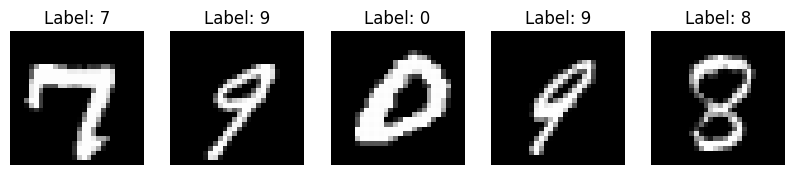

In [3]:
#TODO Code to display 5 random handwritten images from train_X and corresponding labels from train_y

# Setting a fixed size for the plots
plt.figure(figsize=(10, 2))

# Selecting 5 random indices from the range of train_X's length
indices = np.random.choice(train_X.shape[0], 5, replace=False)

# Looping through the randomly selected indices to plot each image and label
for i, index in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_X[index], cmap='gray') # Displaying image in grayscale
    plt.title('Label: {}'.format(train_y[index]))
    plt.axis('off')  # Turning off the axis to make it look cleaner

plt.show()  # Displaying the plots

**Q2.** Given two digits $d_1$ and $d_2$, both between $0$ and $9$, in the following cell fill in the function body to extract all the samples corresponding to $d_1$ or $d_2$ only, from the dataset $X$ and labels $y$. You can use the labels $y$ to filter the dataset. Assume that the $i$th image $X[i]$ in $X$ is given by $y[i]$. The function should return the extracted samples $X_{extracted}$ and corresponding labels $y_{extracted}$. Avoid using for loops as much as possible, infact you do not need any for loops. numpy.where function should be useful.

In [4]:
def extract_digits(X, y, d1, d2):

    assert d1 in range(0, 10), "d1 should be a number between 0 and 9 inclusive"
    assert d2 in range(0, 10), "d2 should be a number between 0 and 9 inclusive"
    
    # Use numpy to find indices of y where the value is either d1 or d2
    indices = np.where((y == d1) | (y == d2))

    # Extract the images and labels for the indices found
    X_extracted = X[indices]
    y_extracted = y[indices]

    return (X_extracted, y_extracted)

print( "DONE" )

DONE


**Q3.** Both the training dataset train_X and test_y is a 3 dimensional numpy array, each image occupies 2 dimensions. For convenience of processing data we usually comvert each $28 \times 28$ image matrix to a vector with $784$ entries. We call this process **vectorize images**.

Once we vectorize the images, the vectorized data set would be structured as follows: $i$th row will correspond to a single image and $j$th column will correspond to the $j$th pixel value of each vectorized image. However going along with the convention we discussed in the lecture, the input to the MLP model will require that the columns correspond to individual images. Hence we also require a transpose of the vectorized results.

The pixel values in the images will range from $0$ to $255$. Normalize the pixel values between $0$ and $1$, by dividing each pixel value of each image by the maximum pixel value of that image. Simply divide each column of the resulting matrix above by the max of each column. 

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdN_8m9FEqjqAB07obTmB6gNc7S2rSoGBYaA&s"></center>

Given a dataset $X$ of size $N \times 28 \times 28$, in the following cell fill in the function to do the following in order;
1. Vectorize the dataset resulting in dataset of size $N \times 784$.
2. Transpose the vectorized result.
3. Normalize the pixel values of each image.
4. Finally return the vectorized, transposed and normalized dataset $X_{transformed}$.

Again, avoid for loops, functions such as numpy.reshape, numpy.max etc should be useful.

In [5]:
def vectorize_images(X):
    # step 1: Reshape the dataset from (N, 28, 28) to (N, 784) where N is the number of images
    X_vectorized = X.reshape(X.shape[0], 784)
    
    # step 2: Transpose the dataset from (N, 784) to (784, N) to have columns as images
    X_vectorized = X_vectorized.T
    
    # step 3: Normalize each column (image) by dividing by the maximum value in each column
    X_vectorized = X_vectorized / 255.0

    # step 4: return
    return(X_vectorized)
    
print ("DONE")

DONE


**Q4.** In the following cell write code to;

1. Extract images of the digits $d_1 = 1$ and $d_2 = 5$ with their corresponding labels for both the training set (train_X, train_y) and testing set (test_X, test_y) separately.
2. Then vectorize the data, tranpose the result and normlize the images.
3. Store the results after the final transformations in numpy arrays train_X_1_5, train_y_1_5, test_X_1_5, test_y_1_5
4. Our MLP will output only class labels $0$ and $1$ (not $1$ and $5$), so create numpy arrays to store the class labels as follows:
   $d_1 = 1$ -> class label = 0 and $d_2 = 5$ -> class label = 1. Store them in the arrays named train_class_1_5, test_class_1_5.

Use the above functions you implemented above to complete this task. In addtion, numpy.where could be useful. Avoid for loops as much as possible.

In [6]:
# Specify digits of interest
d1, d2 = 1, 5

train_X_1_5, train_class_1_5 = extract_digits(train_X, train_y, d1, d2)
train_X_1_5 = vectorize_images(train_X_1_5)
train_class_1_5  = np.where(train_class_1_5 == d1, 0, 1)

test_X_1_5, test_class_1_5 = extract_digits(test_X, test_y, d1, d2)
test_X_1_5 = vectorize_images(test_X_1_5)
test_class_1_5  = np.where(test_class_1_5 == d1, 0, 1)

print(f"Train X shape: {train_X_1_5.shape}, Train labels shape: {train_class_1_5.shape}")
print(f"Test X shape: {test_X_1_5.shape}, Test labels shape: {test_class_1_5.shape}")

print("DONE")

Train X shape: (784, 12163), Train labels shape: (12163,)
Test X shape: (784, 2027), Test labels shape: (2027,)
DONE


## Section 2: Implementing MLP from scratch with training algorithms.

Now we will implement code to build a customizable MLP model. The hidden layers will have the **Relu activation function** and the final output layer will have **Sigmoid activation function**.

**Q5.** Recall the following about the activation functions:
1. Sigmoid activation: $y = \sigma(z) = \frac{1}{1 + e^{-z}}$.
2. Derivative of Sigmoid: $y' = \sigma'(z) = \sigma(z) (1 - \sigma(z)) = y(1-y)$
3. ReLu activation: $y = ReLu(z) = max(0, z)$
4. Derivative of ReLu: $y' = ReLu'(z) = \begin{cases} 0 \; \textrm{if } z < 0 \\ 1 \; \textrm{otherwise} \end{cases} = \begin{cases} 0 \; \textrm{if } y = 0 \\ 1 \; \textrm{otherwise} \end{cases}$

In the following cell implement the functions to compute activation functions Sigmoid and ReLu given $z$ and derivatives of the Sigmoid and ReLu activation functions given $y$. Note that the input to the derivative functions is $y$ not $z$.

In practice the input will not be just single numbers, but matrices. So functions or derivatives should be applied elementwise on matrices. Again avoid for loops, use the power of numpy arrays - search for numpy's capability of doing elementwise computations.

Important: When implementing the sigmoid function make sure you handle overflows due to $e^{-z}$ being too large. To avoid you can choose to set the sigmoid value to 'the certain appropriate value' if $z$ is less than a certain good enough negative threshold. If you do not handle overflows, the entire result will be useless fince the MLP will just output Nan (not a number) for evry input at the end.

In [7]:
def sigmoid(Z):
    # Clip Z to avoid overflow in exponential calculation
    Z = np.clip(Z, -500, 500)
    sigma = 1 / (1 + np.exp(-Z))
    return sigma

def deriv_sigmoid(Y):
    sigma_prime = Y * (1 - Y)
    return sigma_prime

def ReLu(Z):
    relu = np.maximum(0, Z)
    return relu

def deriv_ReLu(Y):
    relu_prime = np.where(Y > 0, 1, 0)
    return relu_prime

print("DONE")

DONE


In [8]:
# Test all the Activation functions
Z = np.array([-1000, 0, 1, 500])
print("Sigmoid:", sigmoid(Z))
print("ReLu:", ReLu(Z))

Y_sigmoid = sigmoid(Z)
Y_relu = ReLu(Z)
print("Derivative Sigmoid:", deriv_sigmoid(Y_sigmoid))
print("Derivative ReLu:", deriv_ReLu(Y_relu))

Sigmoid: [7.12457641e-218 5.00000000e-001 7.31058579e-001 1.00000000e+000]
ReLu: [  0   0   1 500]
Derivative Sigmoid: [7.12457641e-218 2.50000000e-001 1.96611933e-001 0.00000000e+000]
Derivative ReLu: [0 0 1 1]


**Q6.** The following piece of code defines a simple MLP architecture as a Python class and subsequent initialization of a MLP model. <font color='blue'>Certain lines of code contains commented line numbers. Write a short sentence for each such line explaining its purpose. Feel free to refer to the lecture notes or any resources to answers these question. In addition, explain what the Y, Z, W variables refer to and their purpose</font>

In [9]:
class NNet:
    def __init__(self, input_size = 784, output_size = 1, batch_size = 1000, hidden_layers = [500, 250, 50]):
        self.Y = []
        self.Z = []
        self.W = []
        self.input_size = input_size
        self.output_size = output_size
        self.batch_size = batch_size
        self.hidden_layers = hidden_layers

        layers = [input_size] + hidden_layers + [output_size]
        L = len(hidden_layers) + 1
    
        for i in range(1, L + 1):
            self.Y.append(np.zeros((layers[i], batch_size)))                        #line1
            self.Z.append(np.zeros((layers[i], batch_size)))                        #Line2
            self.W.append(2*(np.random.rand(layers[i], layers[i-1] + 1) - 0.5))     #Line3

print("DONE")

DONE


**Answers** (to write answers edit this cell)

(i) What does the Y, Z, W variables refer to and their purpose?
<br><br><font color = '#3842cf'>
Y: This variable represents the output activations of each layer in the network. For each layer (including input and hidden layers, but excluding biases), Y holds the activated values that result from applying the activation function to the linear combinations of inputs and weights. In a neural network, these are crucial for both making predictions and backpropagating errors.
<br><br>
Z: This variable contains the linear combinations of the inputs and weights of each layer before activation (often referred to as pre-activations). Z is calculated by multiplying weights with the input (or output from the previous layer) plus a bias term, and it serves as the input to the activation functions.
<br><br>
W: This array stores the weights and biases for each layer of the network. Weights are fundamental to neural networks as they are the parameters that get adjusted during training to minimize the loss function. Each matrix in W connects two consecutive layers, where the rows correspond to the neurons of the current layer and the columns correspond to the neurons of the previous layer, including an extra column for the bias term.
</font><br>

(ii) Line1: Explanation
<br><br><font color = '#3842cf'>
Initializes the output activations for each layer (except the input layer) to zero matrices of the appropriate size. The dimensions reflect that each column in these matrices represents the activations for one example in the batch, ensuring that the network can handle batch processing efficiently. This pre-allocation is useful for performance, as it avoids dynamically resizing arrays during computation.
</font><br><br>

(iii) Line2: Explanation
<br><br><font color = '#3842cf'>
Similar to Line1, this line initializes the pre-activation values (Z) for each layer to zero. It sets up a placeholder for the linear combinations that will be computed during the forward pass of the network for each batch of data.
</font><br><br>

(iv) Line3: Explanation
<br><br><font color = '#3842cf'>
Randomly initializes the weights (and biases) for each layer. The weights are initialized in a range [-0.5, 0.5] which is a common practice to start training with small random values, helping to break symmetry and ensure that learning progresses well. Including layers[i-1] + 1 in the dimensions accommodates the bias term by creating an extra column in the weight matrix for each layer. This random initialization is crucial as it kickstarts the learning process.
</font><br><br>

**Q7.** Now we will implement the feedforward algorithm. Recall from the lectures that for each layer $l$ there is input $Y^{(l-1)}$ from the previous layer if $l > 1$ and input data $X$ if $l = 1$. Then we compute $Z^{(l)}$ using the weight matrix $W^{(l)}$ as follows from matrix multiplication:

$Z^{(l)} = W^{(l)} Y^{(l-1)}$

Make sure that during multiplication you add an additional row of one's to $Y^{(l-1)}$ to accommodate the bias term. However, the rows of ones should not permanently remain on $Y^{(l-1)}$. <font color='blue'>Explain what the bias term is and how adding a row of one's help with the bias terms.</font> During definition above the weight matrices are initialised to afford this extra bias term, so no change to either $Z^{(l)}$ or $W^{(l)}$ is needed.

Next compute $Y^{(l)}$, the output of layer $l$ by activation through sigmoid.

$Y^{(l)} = \sigma(Z^{(l)})$

The implemented feedforward algorithm should take in a NNet model and an input matrix $X$ and output the modified MLP model - the $Y$'s and $Z$'s computed should be stored in the model for the backpropagation algorithm.

As usual avoid for loops as much as possible, use the power of numpy. However, you may use a for loop to iterate through the layers of the model.

In [10]:
def feedforward(model, X):
    Y_prev = X  # The input to the first layer is the actual input X
    
    for i in range(len(model.W)):
        # Add a row of ones to the previous layer's outputs to account for the bias term
        Y_prev_with_bias = np.vstack([Y_prev, np.ones((1, Y_prev.shape[1]))])

        # Compute the pre-activation for the current layer
        Z_i = np.dot(model.W[i], Y_prev_with_bias)
        model.Z[i] = Z_i
        
        # Apply activation function: use sigmoid for all layers in this setup
        if i == len(model.W) - 1:
            # If it's the last layer, use the sigmoid function
            Y_i = sigmoid(Z_i)
        else:
            # Otherwise, use ReLU for the hidden layers
            Y_i = ReLu(Z_i)
            
        model.Y[i] = Y_i
        Y_prev = Y_i
    
    return(model)

print("DONE")

DONE




**Answer** (to write answers edit this cell)

Explain what the bias term is and how adding a row of one's help with the bias terms.

<font color = '#3842cf'>

Bias term: The bias term in a neural network acts like the intercept in a linear equation. It allows the activation function to be shifted left or right, which can help the model fit the data better and adjust outputs independently from the weighted inputs. 
<br><br>
Adding a row of ones to the input matrix: Adding a row of ones to the input matrix serves to integrate the bias with the weighted sum directly during matrix multiplication. Each neuron's weight vector in the weights matrix includes a bias term as its last element. By appending a row of ones to the input matrix, the last element in the weight vector (the bias) is effectively added to the weighted sum of inputs during the dot product calculation. This simplifies computations and ensures the bias is included in each neuron's output.
</font>

**Q8.** Now we will implement the backpropagation algorithm. The cost function $C$ at the end is given by the square loss.

$C = \frac{1}{2} ||Y^{(L)} - Y||^{2}$, where $Y^{(L)}$ is the final output vector of the feedforward algorithm and $Y$ is the actual label vector associated with the input $X$.

At each layer $l = 1, 2, \cdots, L$ we compute the following (note that the gradients are matrices with the same dimensions as the variable to which we derivating with respect to):

1. Gradient of $C$ with respect to $Z^{(l)}$ as <br> $\frac{\partial C}{\partial Z^{(l)}} = deriv(A^{(l)}(Z^{(l)})) \odot \frac{\partial C}{\partial Y^{(L)}} $, <br> where $A^{(l)}$ is the activation function of the $l$th layer, and we use the derivative of that here. The $\odot$ refers to the elementwise multiplication.

2. Gradient of $C$ with respect to $W^{(l)}$ as <br> $\frac{\partial C}{\partial W^{(l)}} = \frac{\partial C}{\partial Z^{(l)}} (Y^{(l-1)})^{T}$ <br> this is entirely matrix multiplication.

3. Gradient of $C$ with respect to $Y^{(l-1)}$ as <br> $\frac{\partial C}{\partial Y^{(l-1)}} = (W^{(l)})^{T} \frac{\partial C}{\partial Z^{(l)}}$ <br> this is also entirely matrix multiplication.

4. Update weights by: <br> $W^{(l)} \leftarrow W^{(l)} - \eta \frac{\partial C}{\partial W^{(l)}}$, <br> where $\eta > 0$ is the learning rate.

The loss derivative (the gradient of $C$ with respect to $Y^{(L)}$) at the last layer is given by:

$\frac{\partial C}{\partial Y^{(L)}} = Y^{(L)} - Y$

By convention we consider $Y^{(0)} = X$, the input data.

Based on the backpropagation algorithm implement the backpropagation method in the following cell. Remember to temporarily add a row of ones to $Y^{(l-1)}$ when computing $\frac{\partial C}{\partial W^{(l)}}$ as we discussed back in the feedforward algorithm. Make sure you avoid for loops as much as possible.

The function takes in a NNet model, input data $X$ and the corresponding class labels $Y$. learning rate can be set as desired.

In [11]:
def backpropagation(model, X, Y, eta=0.01):

    # Run feedforward to compute the predictions
    model = feedforward(model, X)
    
    L = len(model.W)
    
    # Compute the gradient of the cost function w.r.t. final layer output Y(L)
    dY = model.Y[L-1] - Y
    
    # Compute the gradient w.r.t. Z(L)
    dZ = deriv_sigmoid(model.Y[L-1]) * dY
    
    # Backpropagate from the last layer to the first
    for l in range(L-1, -1, -1):
        
        # Add bias term (row of ones) to the previous layer's activations
        if l > 0:
            Y_prev_with_bias = np.vstack([model.Y[l-1], np.ones((1, model.Y[l-1].shape[1]))])
        else:
            Y_prev_with_bias = np.vstack([X, np.ones((1, X.shape[1]))])
            
        # Compute the gradient w.r.t. weights W(l)
        dW = np.dot(dZ, Y_prev_with_bias.T) / X.shape[1]
        model.W[l] -= eta * dW
        
        # Propagate the gradient back to the previous layer
        if l > 0:
            dZ = np.dot(model.W[l].T, dZ)[:-1] * deriv_ReLu(model.Y[l-1])
            
    return model

print("DONE")

DONE


**Q9.** Now implement the training algorithm.

The training method takes in training data $X$, actual label $Y$, number of epochs, batch_size, learning rate $\eta > 0$. The training will happen in epochs. For each epoch, permute the data columns of both $X$ and $Y$, then divide both $X$ and $Y$ into mini batches each with the given batch size. Then run the feedforward and backpropagation for each such batch iteratively.

At the end of each iteration, keep trach of the cost $C$ and the $l_2$-norm of change in each weight matrix $W^{(l)}$.

At the end of the last epoch, plot the variation cost $C$ and change in weight matrices. Then return the trained model.



model 1 - epochs=20, batch_size=125, eta=0.1
Epoch 1/20 - Cost: 19.527694728514653
Epoch 2/20 - Cost: 3.851681438509702
Epoch 3/20 - Cost: 2.099238810808149
Epoch 4/20 - Cost: 2.0802780249261468
Epoch 5/20 - Cost: 3.141774856087642
Epoch 6/20 - Cost: 1.3695225435426628
Epoch 7/20 - Cost: 1.2953833742648373
Epoch 8/20 - Cost: 1.3200052051229032
Epoch 9/20 - Cost: 1.2395449916043404
Epoch 10/20 - Cost: 1.564144461238092
Epoch 11/20 - Cost: 1.0676876796436063
Epoch 12/20 - Cost: 1.0441077942662078
Epoch 13/20 - Cost: 1.0591713170502488
Epoch 14/20 - Cost: 1.0174831403781646
Epoch 15/20 - Cost: 1.0565925446435913
Epoch 16/20 - Cost: 1.099340998375403
Epoch 17/20 - Cost: 1.082439342565813
Epoch 18/20 - Cost: 1.0433583286651729
Epoch 19/20 - Cost: 0.9226201608210475
Epoch 20/20 - Cost: 0.891679975106956


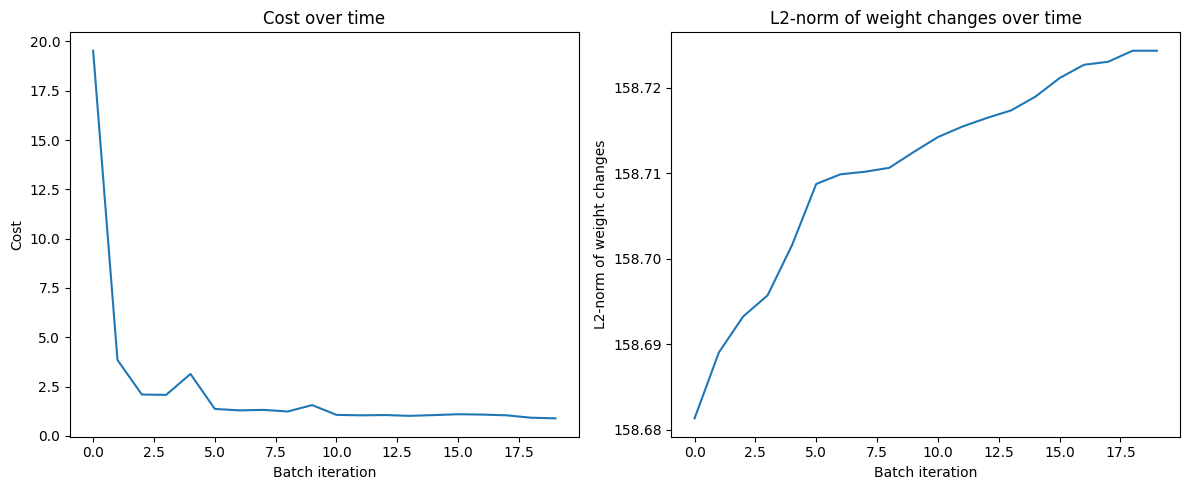


 model 2 - epochs=25, batch_size=250, eta=0.05

Epoch 1/25 - Cost: 29.48240640814744
Epoch 2/25 - Cost: 15.32370812058057
Epoch 3/25 - Cost: 11.266811758308597
Epoch 4/25 - Cost: 8.83723425753596
Epoch 5/25 - Cost: 7.9941866410412805
Epoch 6/25 - Cost: 7.472316193956703
Epoch 7/25 - Cost: 6.819102305395085
Epoch 8/25 - Cost: 5.402485455576211
Epoch 9/25 - Cost: 5.142418817849454
Epoch 10/25 - Cost: 4.691837481479314
Epoch 11/25 - Cost: 4.358695221354005
Epoch 12/25 - Cost: 4.167775980994468
Epoch 13/25 - Cost: 4.330968236460654
Epoch 14/25 - Cost: 3.5524298508805128
Epoch 15/25 - Cost: 3.3475927633153932
Epoch 16/25 - Cost: 3.2865333021593455
Epoch 17/25 - Cost: 3.270790759315021
Epoch 18/25 - Cost: 3.122876353534107
Epoch 19/25 - Cost: 3.045355323765181
Epoch 20/25 - Cost: 3.026320098800957
Epoch 21/25 - Cost: 2.941426978088922
Epoch 22/25 - Cost: 2.6322981647921324
Epoch 23/25 - Cost: 2.5944046189973173
Epoch 24/25 - Cost: 2.6227854113151414
Epoch 25/25 - Cost: 2.5839270647077988


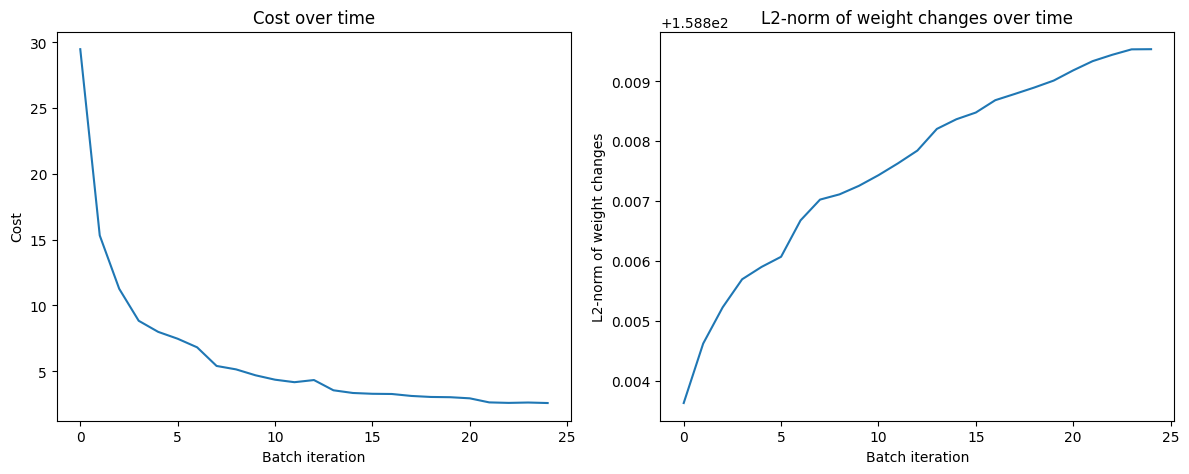

DONE


In [12]:
def train_NNet(X, Y, epochs = 20, batch_size = 1000, eta = 0.01, print_cost = True):

    num_samples = X.shape[1]
    num_batches = num_samples // batch_size

    model = NNet(input_size=X.shape[0], output_size=1,
                 batch_size=batch_size, hidden_layers=[500, 250, 50])

    cost_history = []
    weight_change_history = []

    for epoch in range(epochs):
        perm = np.random.permutation(num_samples)
        X_shuffled = X[:, perm]
        Y_shuffled = Y[perm]

        total_cost = 0
        weight_changes = []

        for batch_start in range(0, num_samples, batch_size):
            
            X_batch = X_shuffled[:, batch_start:batch_start + batch_size]
            Y_batch = Y_shuffled[batch_start:batch_start + batch_size]

            model = backpropagation(model, X_batch, Y_batch, eta)

            cost = 0.5 * np.sum((model.Y[-1] - Y_batch) ** 2)
            total_cost += cost

            weight_changes.append([np.linalg.norm(w_change)
                                  for w_change in model.W])

        cost_history.append(total_cost / num_batches)
        weight_change_history.append(np.mean(weight_changes))

        if print_cost:
            print(f"Epoch {epoch + 1}/{epochs} - Cost: {total_cost / num_batches}")
    
    if print_cost:
        plt.figure(figsize=(12, 5))
        
        # Plot cost history
        plt.subplot(1, 2, 1)
        plt.plot(cost_history, label='Cost')
        plt.xlabel('Batch iteration')
        plt.ylabel('Cost')
        plt.title('Cost over time')
        
        # Plot weight change history
        plt.subplot(1, 2, 2)
        plt.plot(weight_change_history, label='Weight change (L2-norm)')
        plt.xlabel('Batch iteration')
        plt.ylabel('L2-norm of weight changes')
        plt.title('L2-norm of weight changes over time')
        
        plt.tight_layout()
        plt.show()

    return(model)

print("model 1 - epochs=20, batch_size=125, eta=0.1")
model = train_NNet(train_X_1_5, train_class_1_5, epochs=20, batch_size=125, eta=0.1)
print("\n model 2 - epochs=25, batch_size=250, eta=0.05\n")
model2 = train_NNet(train_X_1_5, train_class_1_5, epochs=25, batch_size=250, eta=0.05)

print("DONE")

## Section 3: Evaluation using test data

The following function will evaluate then return an accuracy score and the predicted labels for your model. Do not change anything here.

In [13]:
def test_model(test_data, test_labels, model, d1, d2):
    
    L = len(model.hidden_layers) + 1
    
    Y = test_data
    for i in range(L):
        Z = np.matmul(model.W[i], np.append(Y, np.array([np.ones(Y.shape[1])]), axis = 0))
        if i < L - 1:
            Y = ReLu(Z)
        else:
            Y = sigmoid(Z)
    
    Y = Y[0]
    Y = np.where(Y >= 0.5, 1, 0)
    Y_predicted = np.where(Y == 0, d1, d2)

    acc = accuracy_score(test_labels, Y_predicted)

    return(acc, Y_predicted)

    

**Q10.** Use this test_model function to evaluate your model with the $1$ and $5$ digits. An accuracy $>= 99%$ is achievable. Test with different batch sizes, $\eta$ values and hidden layers. Find which of those hyperparameters gives the best test accuracy. <font color='blue'>Document the hyperparameter values that gives the best testing accuracy and that best accuracy. Plot a confusion matrix and comment on your observations with reasons. Also, look into the nature of the plots that result fom the training procedure, see how they vary with the hyperparameters and provide your ideas on the observations. Then do the same with a few other pairs of digits $d_1, d_2$. Especially, try $d_1 = 1, d_2 = 7$. Comment on your observations and explain possible reasons</font>.

In [14]:
# Test the model
accuracy, predictions = test_model(test_X_1_5, test_class_1_5, model, 0, 1)
print(f'model 1 - Accuracy: {accuracy*100:.2f}%')

accuracy2, predictions2 = test_model(test_X_1_5, test_class_1_5, model2, 0, 1)
print(f'model 2 - Accuracy: {accuracy2*100:.2f}%')

model 1 - Accuracy: 99.41%
model 2 - Accuracy: 98.77%


model 1 - epochs=20, batch_size=125, eta=0.1


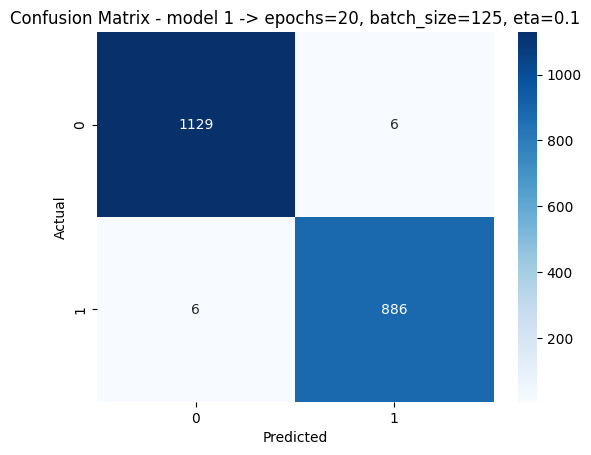

model 2 - epochs=25, batch_size=250, eta=0.05


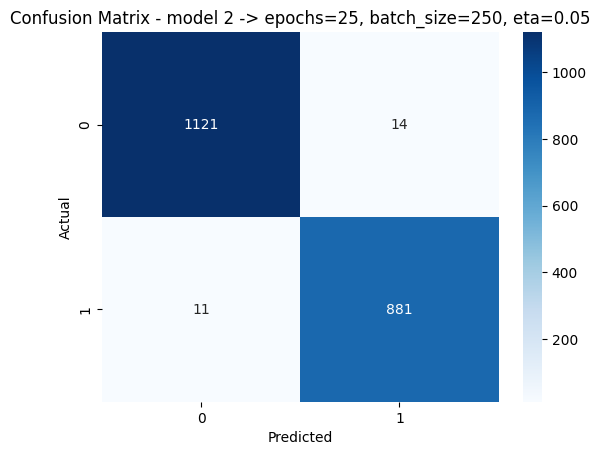

In [15]:

# Plot confusion matrix for matrix 1
print("model 1 - epochs=20, batch_size=125, eta=0.1")
cm = confusion_matrix(test_class_1_5, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - model 1 -> epochs=20, batch_size=125, eta=0.1')
plt.show()

# Plot confusion matrix for matrix 2
print("model 2 - epochs=25, batch_size=250, eta=0.05")
cm = confusion_matrix(test_class_1_5, predictions2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - model 2 -> epochs=25, batch_size=250, eta=0.05')
plt.show()

let's find better values for epochs, batch_size and eta for 1,5 digits

In [16]:
epochs_list = [10, 20, 30]
batch_size_list = [125, 250, 500, 1000]
eta_list = [0.01, 0.1]

for i in range(len(epochs_list)):
    for j in range(len(batch_size_list)):
        for k in range(len(eta_list)):
            model = train_NNet(train_X_1_5, train_class_1_5, epochs=epochs_list[i], batch_size=batch_size_list[j], eta=eta_list[k], print_cost=False)
            accuracy, predictions = test_model(test_X_1_5, test_class_1_5, model, 0, 1)
            print(f"Training model with epochs={epochs_list[i]}, batch_size={batch_size_list[j]}, eta={eta_list[k]} | Accuracy: {accuracy*100:.2f}%")


Training model with epochs=10, batch_size=125, eta=0.01 | Accuracy: 91.81%
Training model with epochs=10, batch_size=125, eta=0.1 | Accuracy: 44.01%
Training model with epochs=10, batch_size=250, eta=0.01 | Accuracy: 88.65%
Training model with epochs=10, batch_size=250, eta=0.1 | Accuracy: 98.27%
Training model with epochs=10, batch_size=500, eta=0.01 | Accuracy: 58.12%
Training model with epochs=10, batch_size=500, eta=0.1 | Accuracy: 97.53%
Training model with epochs=10, batch_size=1000, eta=0.01 | Accuracy: 63.94%
Training model with epochs=10, batch_size=1000, eta=0.1 | Accuracy: 43.86%
Training model with epochs=20, batch_size=125, eta=0.01 | Accuracy: 96.89%
Training model with epochs=20, batch_size=125, eta=0.1 | Accuracy: 98.87%
Training model with epochs=20, batch_size=250, eta=0.01 | Accuracy: 95.56%
Training model with epochs=20, batch_size=250, eta=0.1 | Accuracy: 98.32%
Training model with epochs=20, batch_size=500, eta=0.01 | Accuracy: 86.43%
Training model with epochs=20

<font color='#3842cf'>
Best Parameters which I got for 1 and 5 digits.
<br>     epochs=30, 
<br>     batch_size=250
<br>     eta=0.1, 
<br>     accuracy = 99.21%
</font>

Epoch 1/20 - Cost: 12.994385566554417
Epoch 2/20 - Cost: 2.653910729268893
Epoch 3/20 - Cost: 1.6188875527392594
Epoch 4/20 - Cost: 1.5553431662864594
Epoch 5/20 - Cost: 1.6870968875685683
Epoch 6/20 - Cost: 1.2754549044136463
Epoch 7/20 - Cost: 1.3757175778486952
Epoch 8/20 - Cost: 1.0578151886505962
Epoch 9/20 - Cost: 1.7724738466598995
Epoch 10/20 - Cost: 0.9472918954447185
Epoch 11/20 - Cost: 1.5474752724269791
Epoch 12/20 - Cost: 0.9655471500489706
Epoch 13/20 - Cost: 0.8973141232971696
Epoch 14/20 - Cost: 0.8604138562554707
Epoch 15/20 - Cost: 0.8401336353831043
Epoch 16/20 - Cost: 0.8833789017110902
Epoch 17/20 - Cost: 0.7740379768881974
Epoch 18/20 - Cost: 0.7740378138132106
Epoch 19/20 - Cost: 0.7740375066330979
Epoch 20/20 - Cost: 0.774036768613837


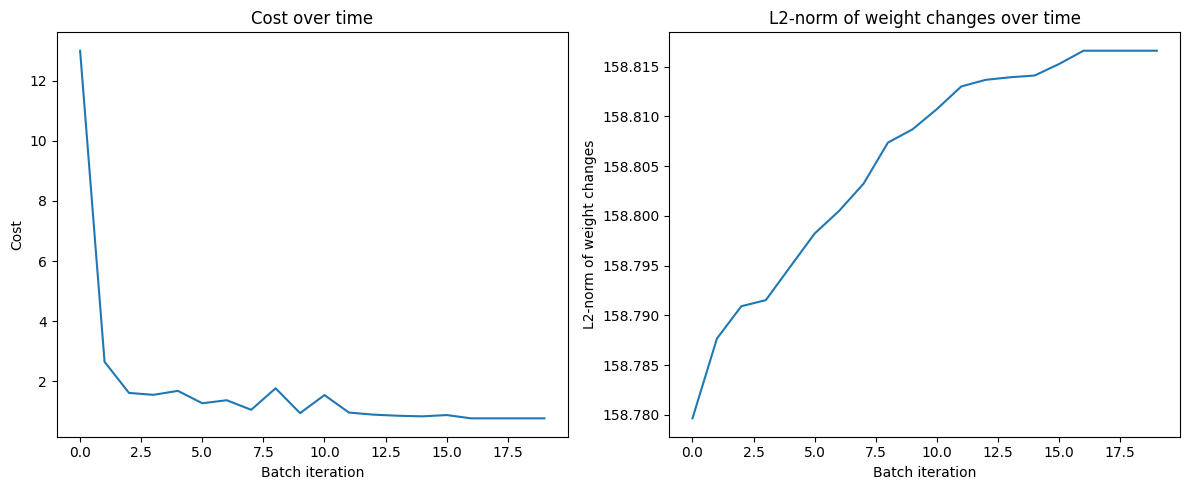

In [17]:
# Specify new digits
d3, d4 = 1, 7

# Extract digits d1 and d2 , Vectorize, Convert labels: d1 -> 0, d2 -> 1
train_X_1_7, train_class_1_7 = extract_digits(train_X, train_y, d3, d4)
train_X_1_7 = vectorize_images(train_X_1_7)
train_class_1_7  = np.where(train_class_1_7 == d3, 0, 1)

# Extract digits d1 and d2 from testing dataset, Vectorize, Convert labels: d1 -> 0, d2 -> 1
test_X_1_7, test_class_1_7 = extract_digits(train_X, train_y, d1, d2)
test_X_1_7 = vectorize_images(test_X_1_7)
test_class_1_7  = np.where(test_class_1_7 == d3, 0, 1)

model_1_7 = train_NNet(train_X_1_7, train_class_1_7, epochs=20, batch_size=125, eta=0.1)

Analysis with digit pair (1 and 7):

Accuracy: 88.12%
model -> epochs=20, batch_size=125, eta=0.1


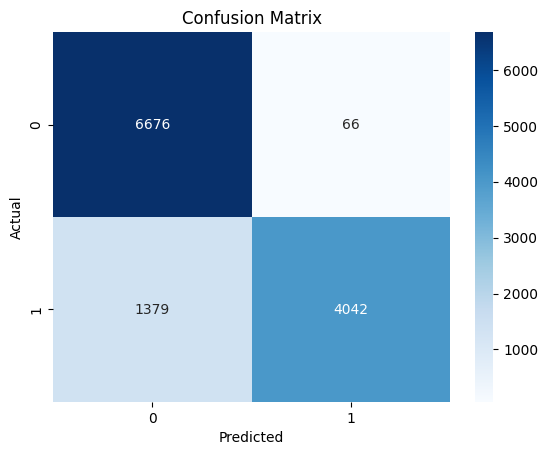

In [18]:
# Test the model
accuracy_1_7, predictions_1_7 = test_model(test_X_1_7, test_class_1_7, model_1_7, 0, 1)
print(f'Accuracy: {accuracy_1_7*100:.2f}%')

# Plot confusion matrix
print("model -> epochs=20, batch_size=125, eta=0.1")
cm = confusion_matrix(test_class_1_7, predictions_1_7)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

When there are similarities between the two labels we are using to train the model, this model underperform compared to the previous model. The new model falsely identified digit 7 as digit 1 significant no of times. 
So we get less accuracy than previously.